In [1]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister

In [2]:
#2 quantum registers
qr=QuantumRegister(2)

In [3]:
#2 classical registers
cr=ClassicalRegister(2)

In [4]:
#Creating a quantum circuit of qr quantum registers and cr classical registers 
qCircuit=QuantumCircuit(qr,cr)

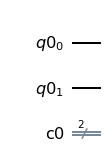

In [5]:
#Drawing the circuit
qCircuit.draw()


In [6]:
#Adding a Hadamard gate for one qubit
qCircuit.h(qr[0])

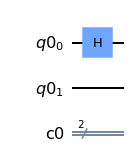

In [7]:
qCircuit.draw()

In [8]:
#Adding a CNOT gate with control as qr[0] and target as qr[1]
qCircuit.cx(qr[0],qr[1])

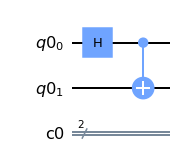

In [9]:
qCircuit.draw()

In [10]:
#Measure qr quantum registers and pass the output to cr classical registers
qCircuit.measure(qr,cr)

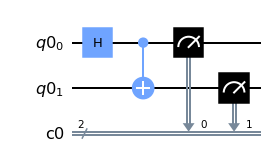

In [11]:
qCircuit.draw()

In [12]:
#Setting up the simulation
from qiskit import Aer,execute
simulator=Aer.get_backend('qasm_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
#Simulating the circuit
result=execute(qCircuit,backend=simulator).result()

In [14]:
from qiskit.tools.visualization import plot_histogram

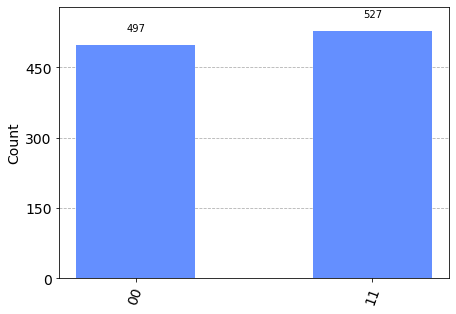

In [15]:
#Plotting the counts of the classical outputs
plot_histogram(result.get_counts())

In [16]:
#Loading IBM Quantum experience account
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
#Choosing the provider
provider=IBMQ.get_provider('ibm-q')

Choose a backend from the list of avialble quantum resources for you: https://quantum-computing.ibm.com/services/resources?tab=yours

In [19]:
#choosing the quantum computer to run the quantum circuit
backend_qc = provider.get_backend('ibm_oslo')  #'ibmq_quito'

In [20]:
#Executing the quantum circuit on the chosen quantum computer
job=execute(qCircuit,backend=backend_qc)

In [21]:
from qiskit.tools.monitor import job_monitor

In [22]:
#Monitoring the job
job_monitor(job)

Job Status: job has successfully run


In [23]:
#Getting the results of the job
result=job.result()

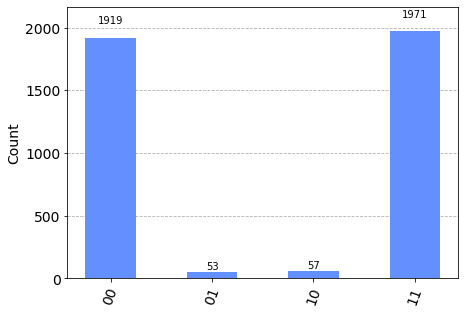

In [24]:
#Plot the results
plot_histogram(result.get_counts())